In [1]:
# Importando bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# Importando os arquivos CSV

trips_df = pd.read_csv('/datasets/project_sql_result_01.csv')
location_df = pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
# Verificar se os tipos de dados estão corretos

print(trips_df.info())
print(location_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [4]:
# Imprimindo as primeiras linhas dos DFs

print("Trips:")
print(trips_df.head())

print("")

print("Location:")
print(location_df.head())

Trips:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Location:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


**Análise dos tipos de dados:**

Company name = Object OK (Texto)
Trips amount = Inteiro OK (Número de viagens tem que ser inteiro, não tem como ser decimal)

Drop off location name = Object OK (Texto)
Average trips = Float OK (Como é uma média, vai acabar tendo casas decimais)

In [5]:
# Identificar os 10 principais bairros em termos de destinos

top_10_locations = location_df.nlargest(10, 'average_trips')

top_10_locations['average_trips'] = top_10_locations['average_trips'].round(1) # Deixar só uma casa decimal

top_10_locations

,dropoff_location_name,average_trips
0,Loop,10727.5
1,River North,9523.7
2,Streeterville,6664.7
3,West Loop,5163.7
4,O'Hare,2546.9
5,Lake View,2421.0
6,Grant Park,2068.5
7,Museum Campus,1510.0
8,Gold Coast,1364.2
9,Sheffield & DePaul,1259.8


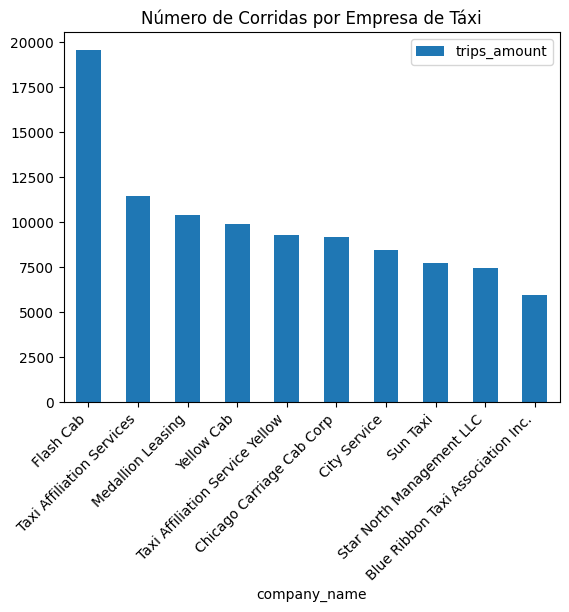

In [6]:
# Gráfico - empresas de táxi e número de corridas - Top 10, pois com todos nem dá para ler!

# Selecionar as 20 principais empresas de táxi com base no número de corridas
top_10_trips_df = trips_df.nlargest(10, 'trips_amount')

top_10_trips_df.plot(kind='bar', x='company_name', y='trips_amount', title='Número de Corridas por Empresa de Táxi')

# Rotacionar os nomes das companhias para melhor visualização
plt.xticks(rotation=45, ha='right')

plt.show()

In [7]:
# Exibir a tabela simples com as informações

top_10_trips_df[['company_name', 'trips_amount']]

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Conclusões:

Flash Cab é a líder com quase 2x mais corridas que o segundo lugar, com 19.558, que é a Taxi Affiliation Services, com 11.422.
Em 20º lugar, temos a Chicago Medallion Leasing INC com 1.607 corridas.

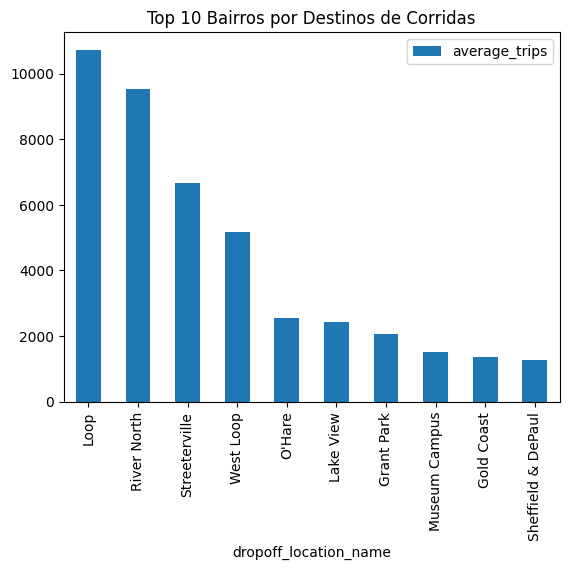

In [8]:
# Gráfico - top 10 bairros por número de corridas em que esse bairro é destino

top_10_locations.plot(kind='bar', x='dropoff_location_name', y='average_trips', title='Top 10 Bairros por Destinos de Corridas')
plt.show()

In [9]:
# Exibir a tabela simples com as informações

top_10_locations[['dropoff_location_name', 'average_trips']]

,dropoff_location_name,average_trips
0,Loop,10727.5
1,River North,9523.7
2,Streeterville,6664.7
3,West Loop,5163.7
4,O'Hare,2546.9
5,Lake View,2421.0
6,Grant Park,2068.5
7,Museum Campus,1510.0
8,Gold Coast,1364.2
9,Sheffield & DePaul,1259.8


**Conclusões:**
O bairro onde mais corridas terminam é o Loop, com uma média de 10727. E em 10°, é o bairro Sheffield & DePaul com uma média de aproximadamente 1260 corridas finalizadas.

Testando a hipótese: 
"A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos." 

Decida onde definir o nível de significância (alfa) por conta própria.

In [10]:
# Importando o arquivo CSV
trips_loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')

# Imprimindo as primeiras linhas do DF
trips_loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [11]:
# Analisando a quantidade de corridas em dias com o tempo bom ou ruim:
trips_loop_ohare['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

In [12]:
# Verificar se os tipos de dados estão corretos

print(trips_loop_ohare.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


In [13]:
# Analisando dias bons e ruins:

bad_weather = trips_loop_ohare.query('weather_conditions == "Bad"')['duration_seconds'].reset_index()
good_weather = trips_loop_ohare.query('weather_conditions == "Good"')['duration_seconds'].reset_index()

np.var(bad_weather['duration_seconds']), np.var(good_weather['duration_seconds'])

(517403.56330246915, 575732.9308497686)

In [14]:
# Fazendo o teste de hipótese:

t_statistic, p_value = st.ttest_ind(bad_weather['duration_seconds'], good_weather['duration_seconds'], equal_var = True)

alpha = 0.05 # Utilizei o nível de significância (alfa) como 0,05 que é o que geralmente utilizamos

print(f"Teste estatístico t: {t_statistic}")
print(f"Valor p: {p_value}")

if p_value < alpha:
    print("Rejeita a hipótese nula (H0). As durações médias são diferentes.")
else:
    print("Não rejeita a hipótese nula (H0). As durações médias não são diferentes.")     

Teste estatístico t: 6.946177714041499
Valor p: 6.517970327099473e-12
Rejeita a hipótese nula (H0). As durações médias são diferentes.


**Conclusão:**
A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare varia em dias chuvosos.

**Conclusões gerais:**

A empresa de taxi Flash Cab lidera o mercado em Chicago. 
Os bairros Loops e River North são os destinos mais populares.
As análises mostraram que a duração das corridas do Loop para o Aeroporto O'Hare varia significativamente entre dias "bons" e "ruins". Em condições climáticas adversas, como chuvas, as corridas tendem a ser mais longas e menos previsíveis devido a fatores como congestionamento e visibilidade reduzida.